# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [62]:
import tensorflow
tensorflow.__version__

'2.2.0-rc1'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [0]:
# Creating a local folder in assigned colab instance for faster processing.
! mkdir /content/My_Files

In [0]:
# Moving data files from drive to colab instance folder
!cp /content/drive/My\ Drive/Aligned\ Face\ Dataset\ from\ Pinterest.zip /content/My_Files
!cp /content/drive/My\ Drive/vgg_face_weights.h5 /content/My_Files

In [0]:
# Setting the newly created folder as my working directory
import os
os.chdir('/content/My_Files')

In [0]:
# Verifying the present working directory
!pwd

/content/My_Files


### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
from zipfile import ZipFile
file_name = "Aligned Face Dataset from Pinterest.zip"


In [0]:
with ZipFile(file_name, 'r') as zip:    
    print('Extracting all the files now...') 
    zip.extractall('images') 
    print('Done!') 

Extracting all the files now...
Done!


In [0]:
#### Add your code here ####
#Adjusting my working directory.  There are two folders containing same images.  Unable to find difference between both
#So using the first one.
os.chdir('/content/My_Files/images')

In [0]:
!pwd

/content/My_Files/images


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        #print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [0]:
img = load_image(metadata[0].image_path())

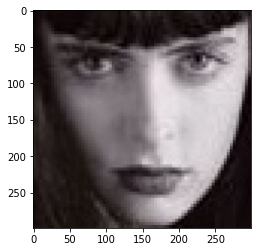

In [69]:
import matplotlib.pyplot as plt
plt.imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
# Loading the model
model = vgg_face()

In [72]:
# Verifying
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)    

In [0]:
# loading predefined weights to the model
model.load_weights('/content/My_Files/vgg_face_weights.h5')


### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [75]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
#### Add your code here ####
import numpy as np
zero = np.zeros(2622)
embeddings =[]
for i in range(len(metadata)):
  try:
    img_path = metadata[i].image_path()
    img = load_image(img_path)

    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))
    #print(img.shape)

    # Obtain embedding vector for an image
    # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    #print(embedding_vector.shape)
    embeddings.append(embedding_vector)
  except:
    print('Exception occurred ' + str(i))
    embeddings.append(zero)


**No exception occurred!!**

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

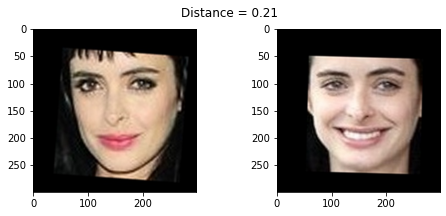

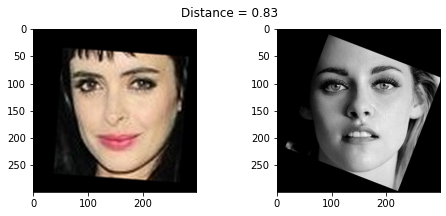

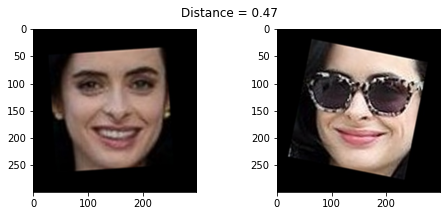

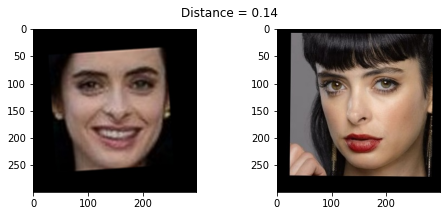

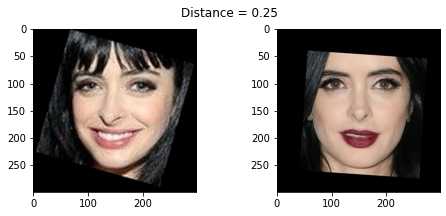

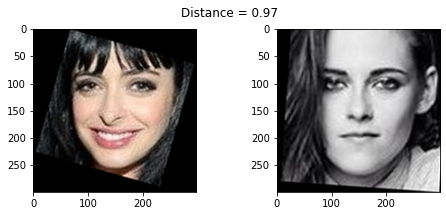

In [78]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70,115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####

In [0]:
X_test =  [embeddings[idx] for idx , value  in enumerate(test_idx) if value]
X_train =  [embeddings[idx] for idx , value  in enumerate(train_idx) if value]

In [0]:
y_test =  [metadata[idx].name for idx , value  in enumerate(test_idx) if value]
y_train =  [metadata[idx].name for idx , value  in enumerate(train_idx) if value]

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_trn = le.fit_transform(y_train)
y_test_trn =  le.transform(y_test)


### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
#### Add your code here ####

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

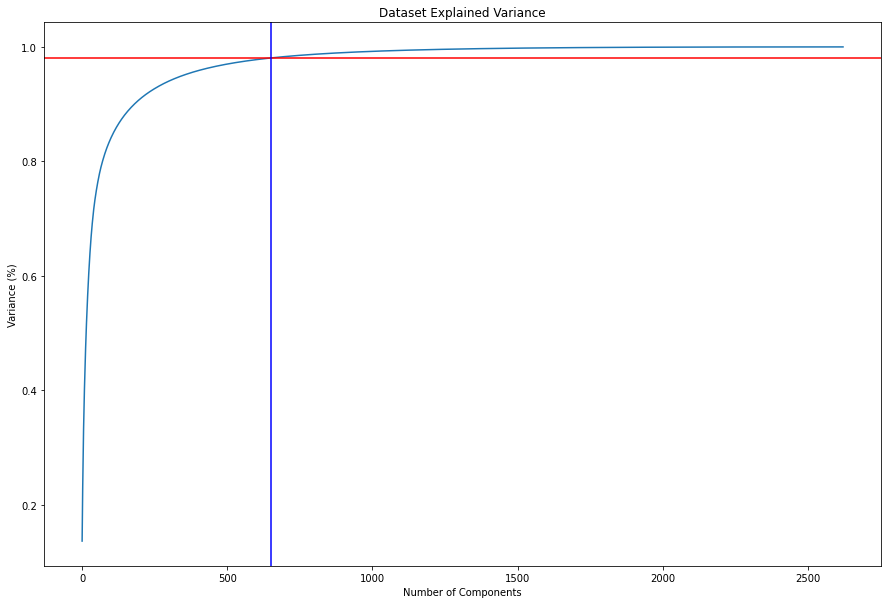

In [99]:
from sklearn.decomposition import PCA

import numpy as np


#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train_scale)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.axhline(y=0.98, color='r', linestyle='-')
plt.axvline(650, c='b')
plt.show()

From the above plot I came to know approximately 650 components contribute for the 98% of the variance in the given dataset. So I have chosen 650.

In [0]:
pca = PCA(n_components=650)
X_train_pca=pca.fit_transform(X_train_scale)

In [0]:
X_test_pca=pca.transform(X_test_scale)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [102]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train_pca,y_train_trn)
y_pred = clf.predict(X_test_pca)
print(accuracy_score(y_test_trn,y_pred))

0.9649122807017544


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

Actual Identiy of the image is pins_Krysten Ritter



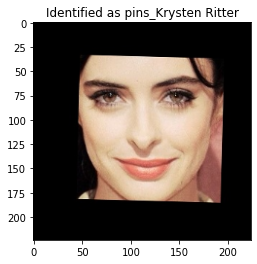

In [110]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_image = (example_image / 255.).astype(np.float32)

example_image = cv2.resize(example_image, dsize = (224,224))
example_image_features = vgg_face_descriptor.predict(np.expand_dims(example_image, axis=0))[0]

## Applying transformation 
example_image_scale = scaler.transform(np.expand_dims(example_image_features, axis=0))
## Applying PCA
example_image_pca=pca.transform(example_image_scale)
example_prediction = clf.predict(example_image_pca)
example_identity = le.inverse_transform(example_prediction)[0]
actual_identity = metadata[test_idx][example_idx].name
print(f'Actual Identiy of the image is {actual_identity}')
print()
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');
